<a href="https://colab.research.google.com/github/tanviagwl98/ImageCartoonization_OpenCV/blob/master/Cartoonization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [19]:
import cv2
import numpy as np

**Setting Parameters**

In [23]:
num_down = 2
num_bil = 7

**Reading Image**

In [24]:
img = cv2.imread("Ruhi.jpg") #my friend's pic
print(img.shape)

(640, 640, 3)


**Resizing to Reduce Computation Cost**

In [25]:
img = cv2.resize(img,(800,800))

In [26]:
colorImage = img


**Downscaling Image**

In [27]:
for _ in range(num_down):
  colorImage = cv2.pyrDown(colorImage)

**Applying Bilateral Filter to smoothen image.**

In [10]:
for _ in range(num_bil):
   colorImage = cv2.bilateralFilter(colorImage, d=9, sigmaColor=9, sigmaSpace=7)

**Upsacling to restore image after using bilateralfilter()**

In [28]:
for _ in range(num_down):
  colorImage = cv2.pyrUp(colorImage)

**Converting Image to Gray Scale Image**

In [29]:
grayImage = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

**Using Median Blur**

In [30]:
blurImage = cv2.medianBlur(grayImage, 7)

**Performing Adaptive Thresholding**

In [31]:
edgeImage = cv2.adaptiveThreshold(blurImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)

In [32]:
edgeImage = cv2.cvtColor(edgeImage, cv2.COLOR_GRAY2RGB)


**Combining colorImage and edgeImage using bitwise_and**

In [16]:
cartoonImage = cv2.bitwise_and(colorImage, edgeImage)

**I have used Google Colab for this so cv2_imshow is imported to get the output image after cartoonization**

In [33]:
from google.colab.patches import cv2_imshow

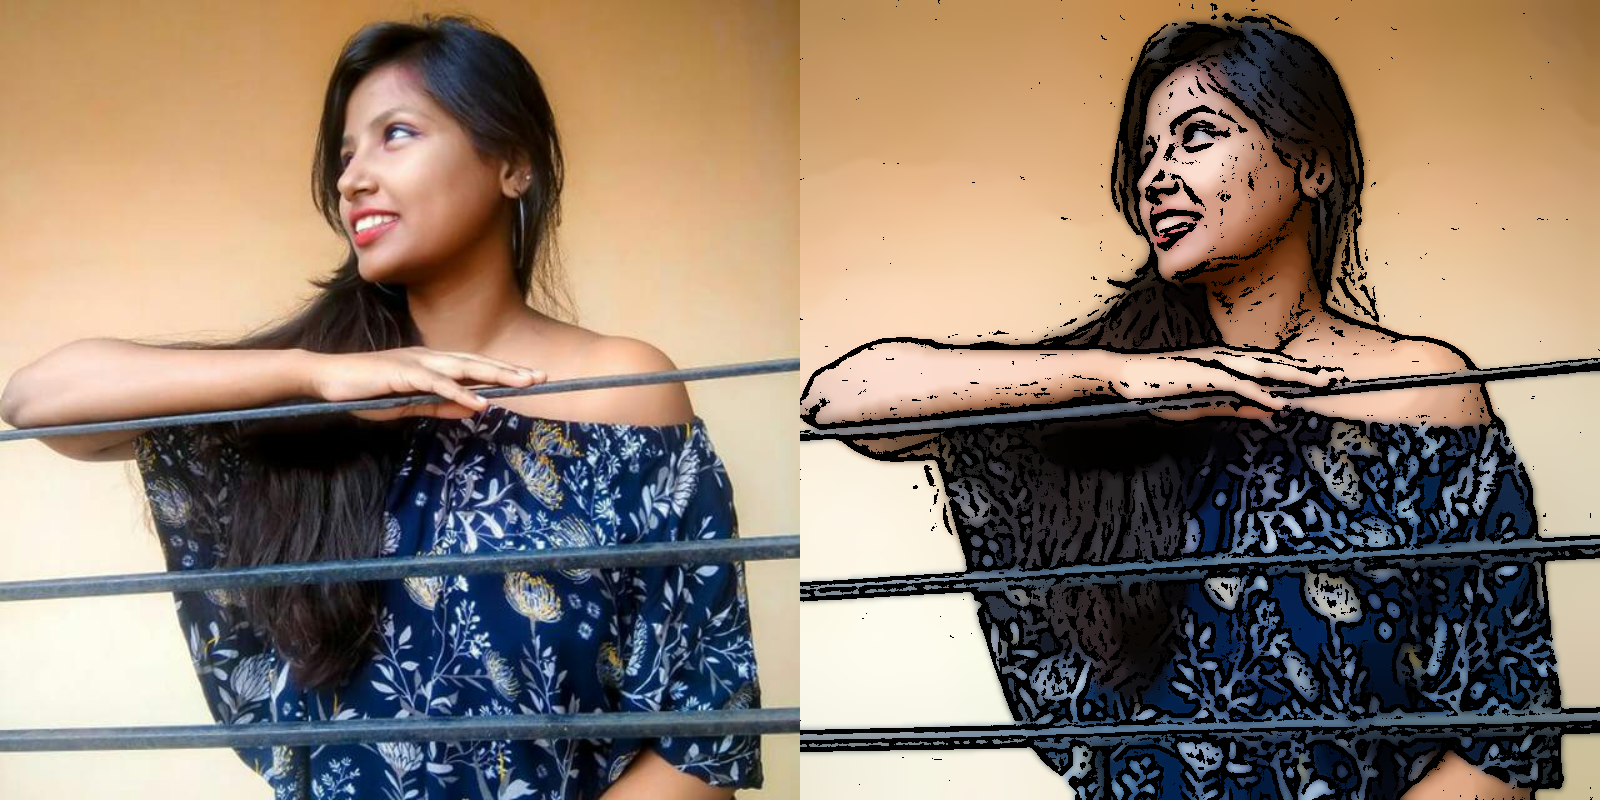

In [34]:
stack = np.hstack([img, cartoonImage])
cv2_imshow(stack)